In [1]:
#Let's start with importing necessary Libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#  check  data type of each column 
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.shape

(30, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
# Checking Null Values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
There are no null values in data set

SyntaxError: invalid syntax (3130464756.py, line 1)

In [9]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
def EDA(df,i): # create a function for Continuous variables
    plt.figure(figsize=(20,5),facecolor='#FFCBA4')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

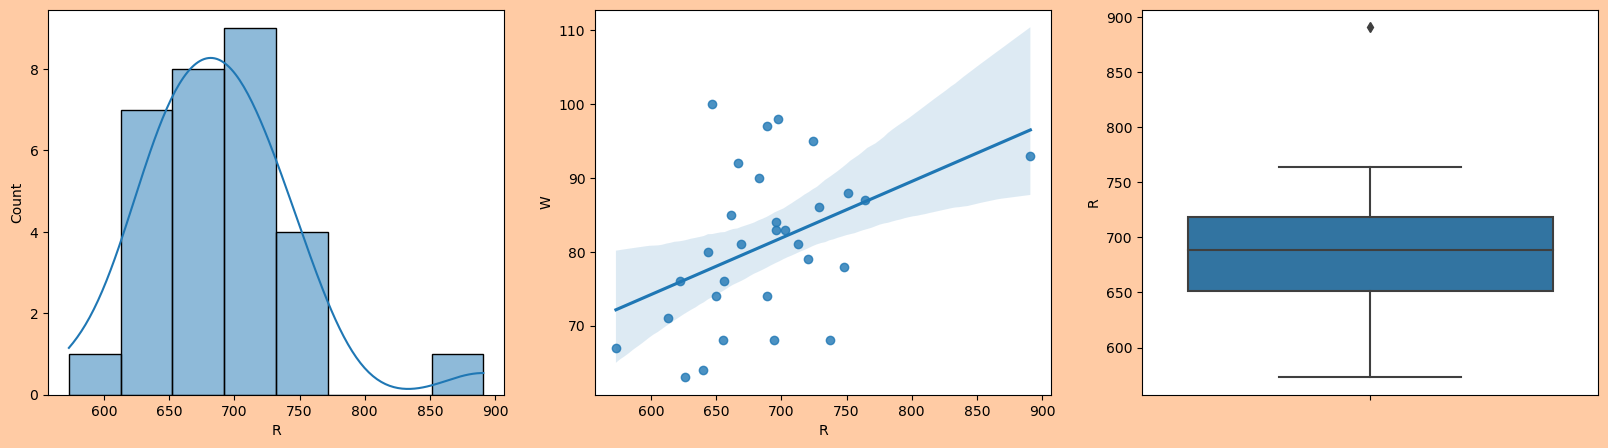

In [12]:
EDA(df,'R')

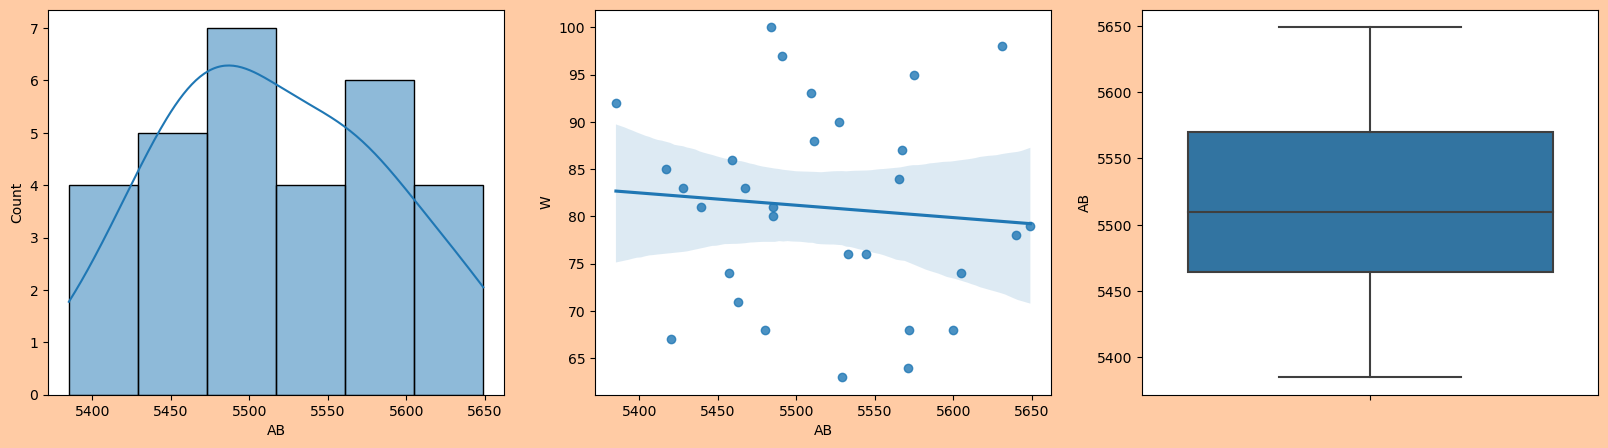

In [13]:
EDA(df,'AB')

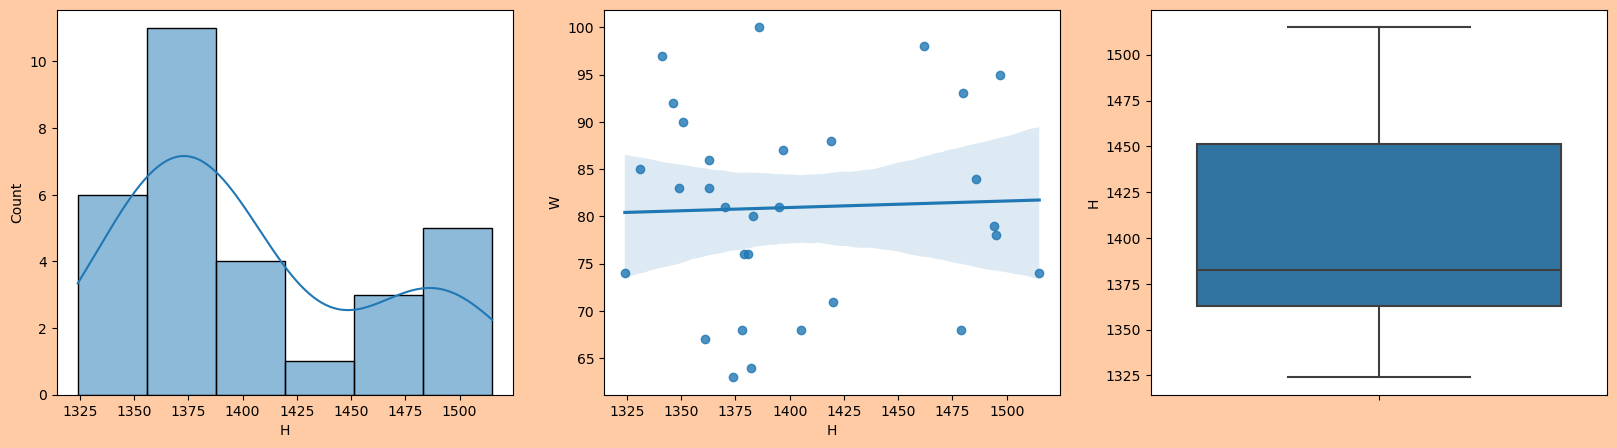

In [14]:
EDA(df,'H')

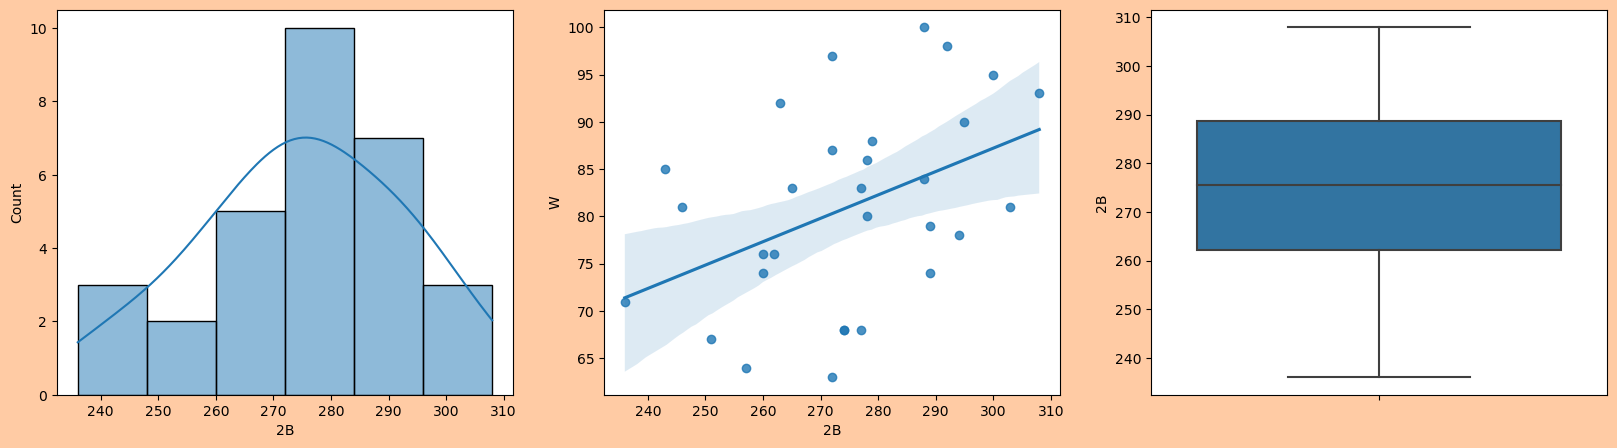

In [15]:
EDA(df,'2B')

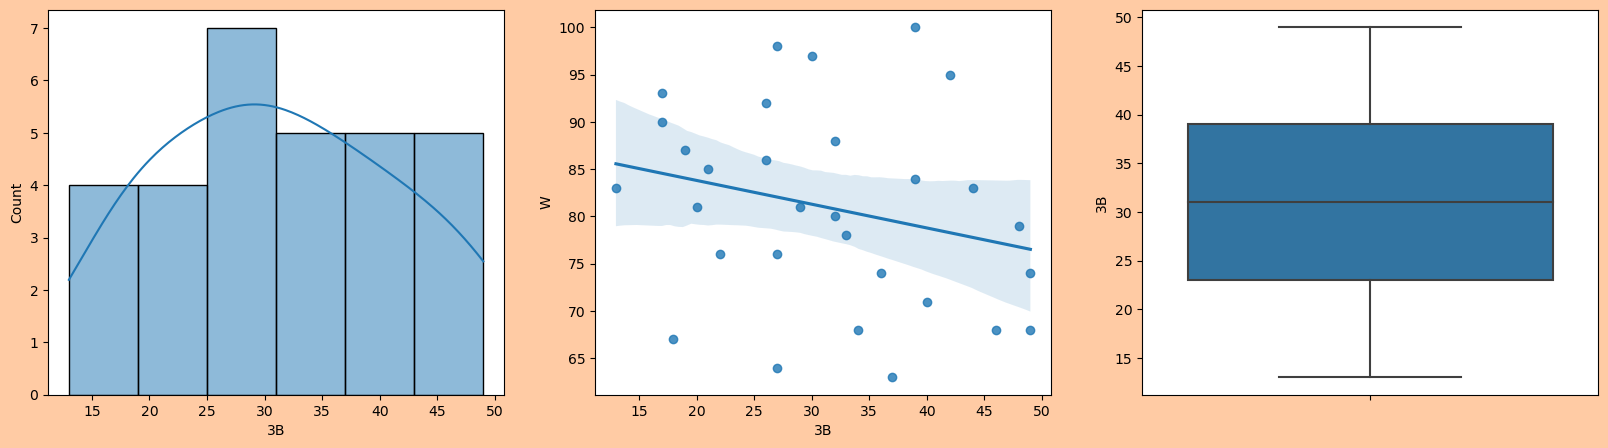

In [16]:
EDA(df,'3B')

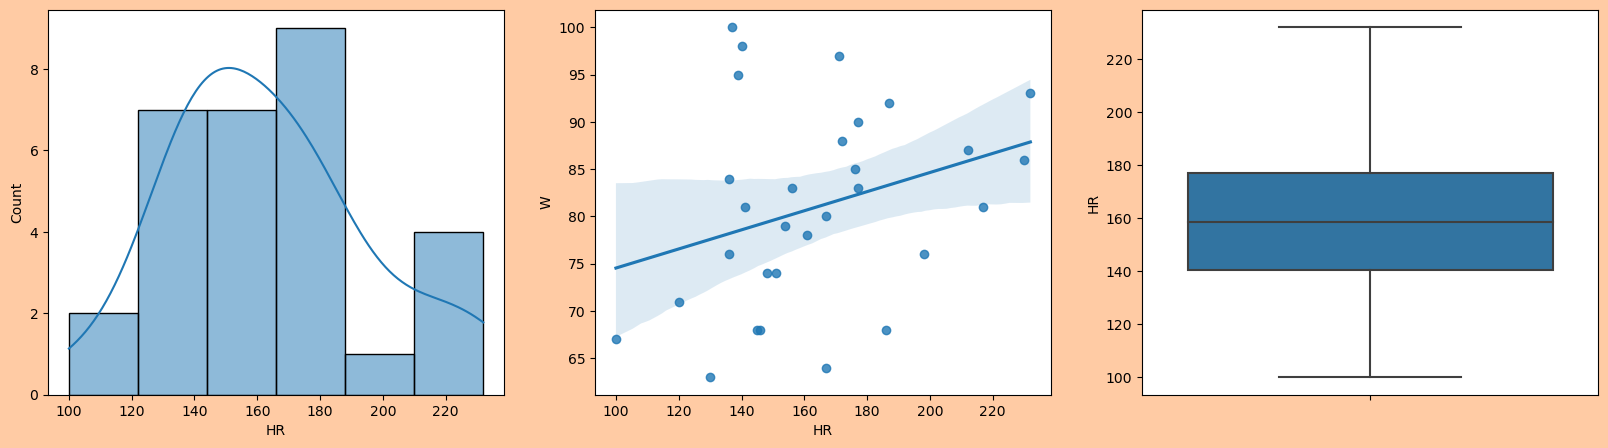

In [17]:
EDA(df,'HR')

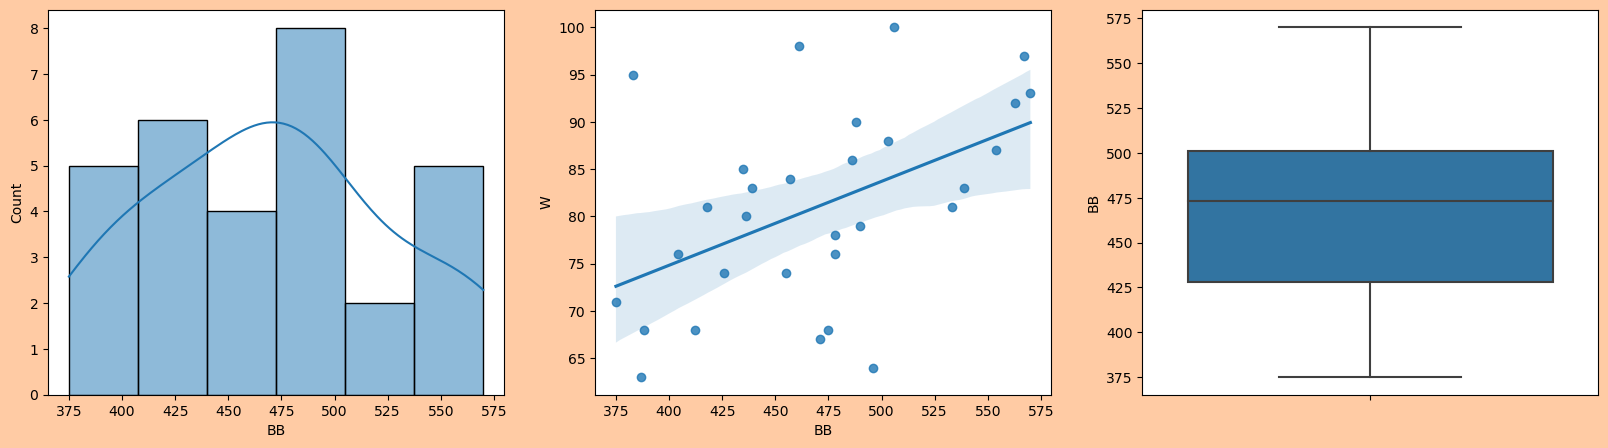

In [18]:
EDA(df,'BB')

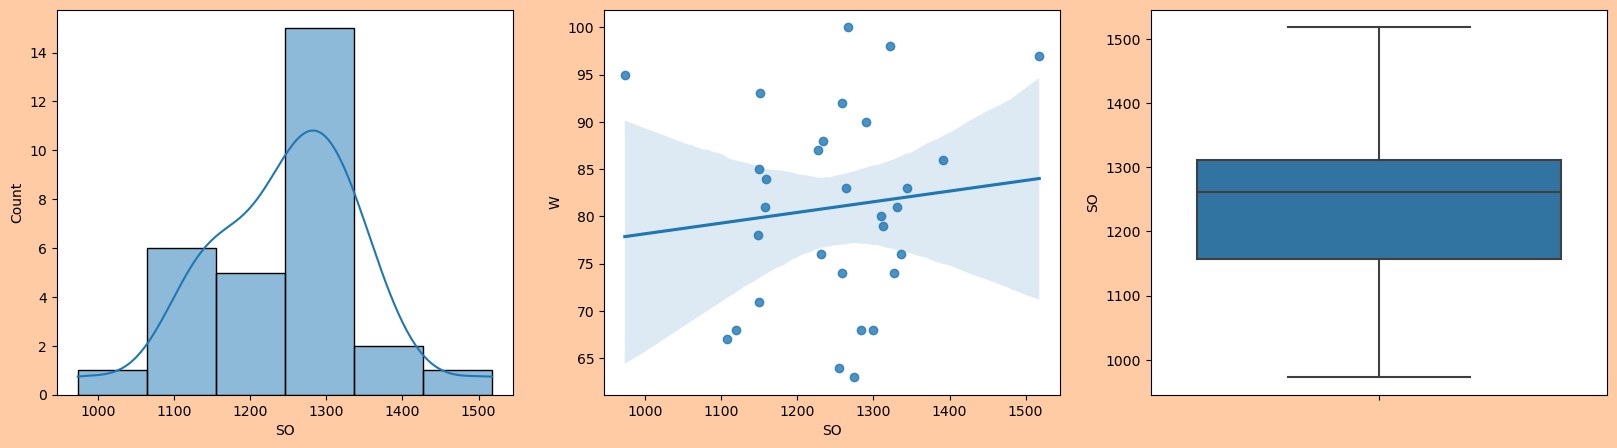

In [19]:
EDA(df,'SO')

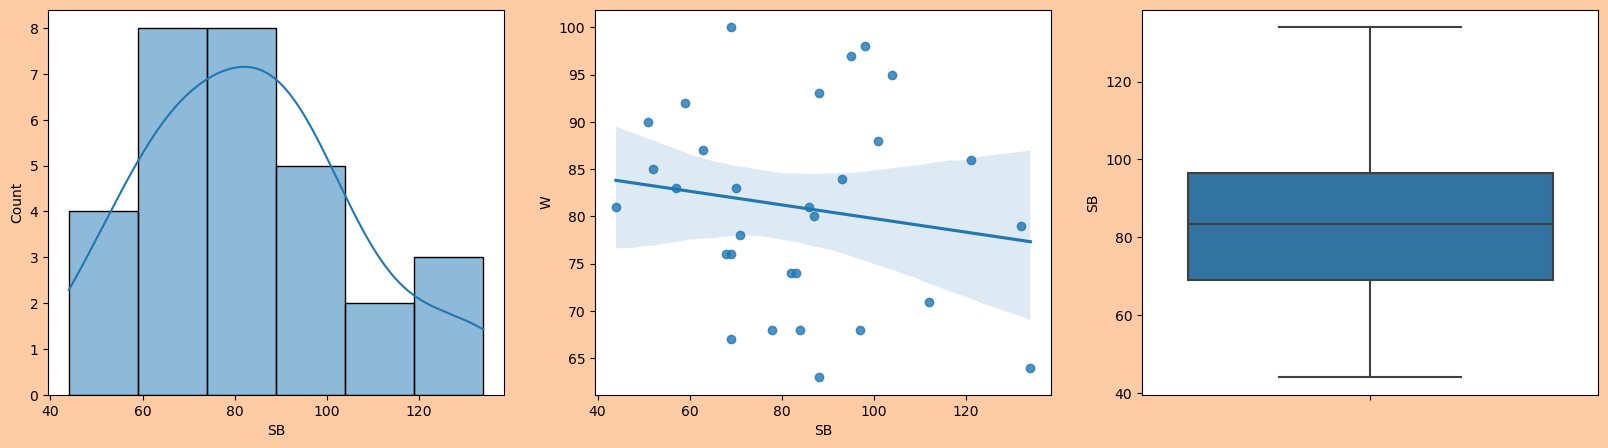

In [20]:
EDA(df,'SB')

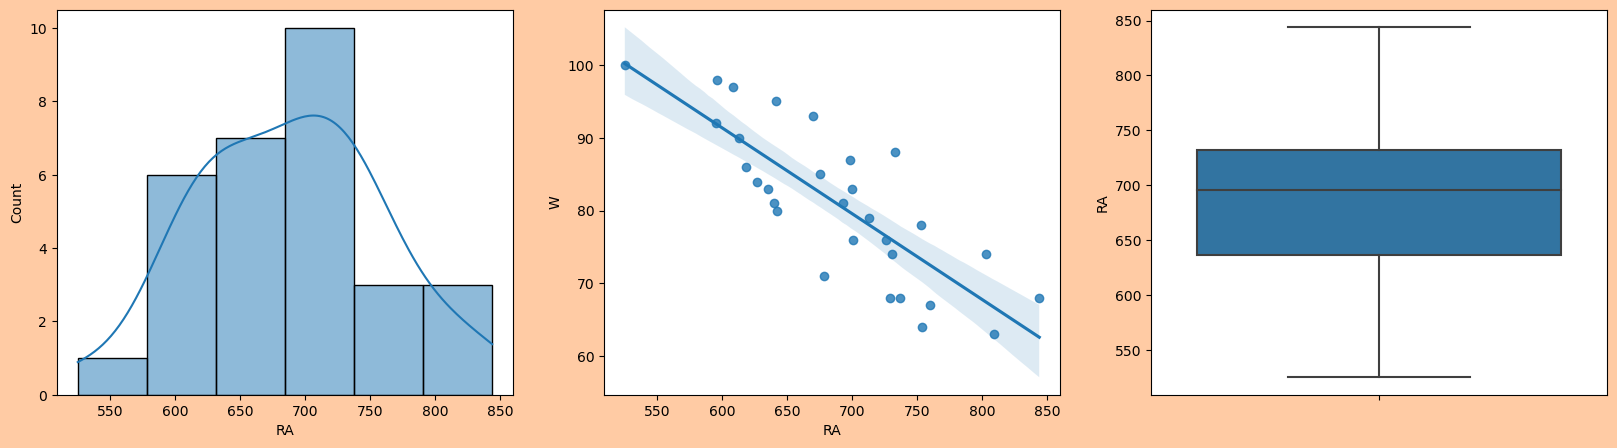

In [21]:
EDA(df,'RA')

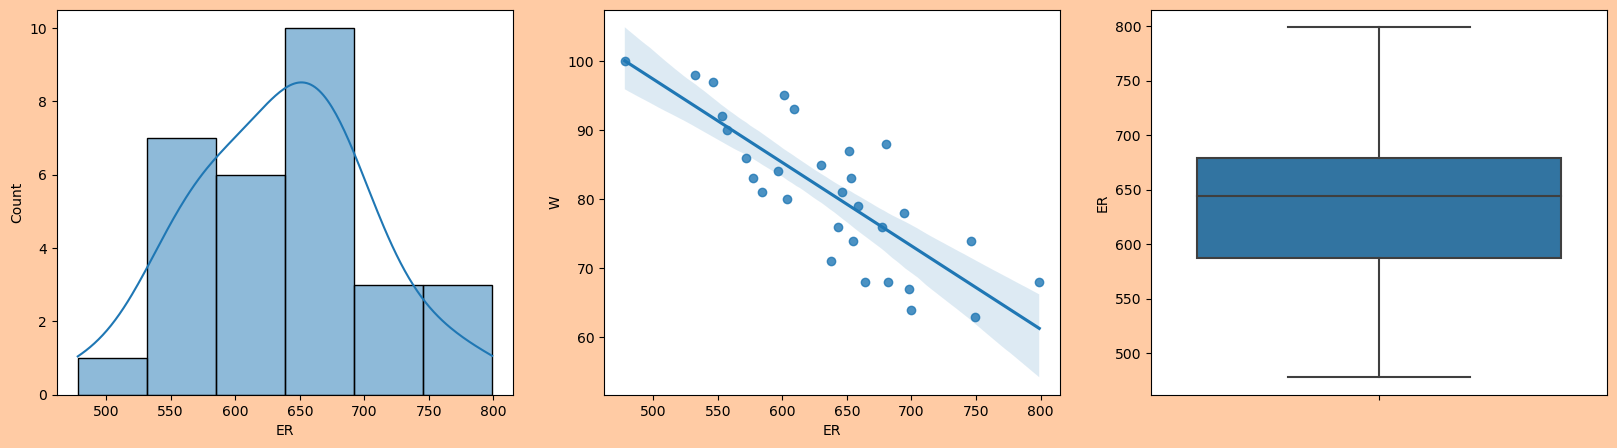

In [22]:
EDA(df,'ER')

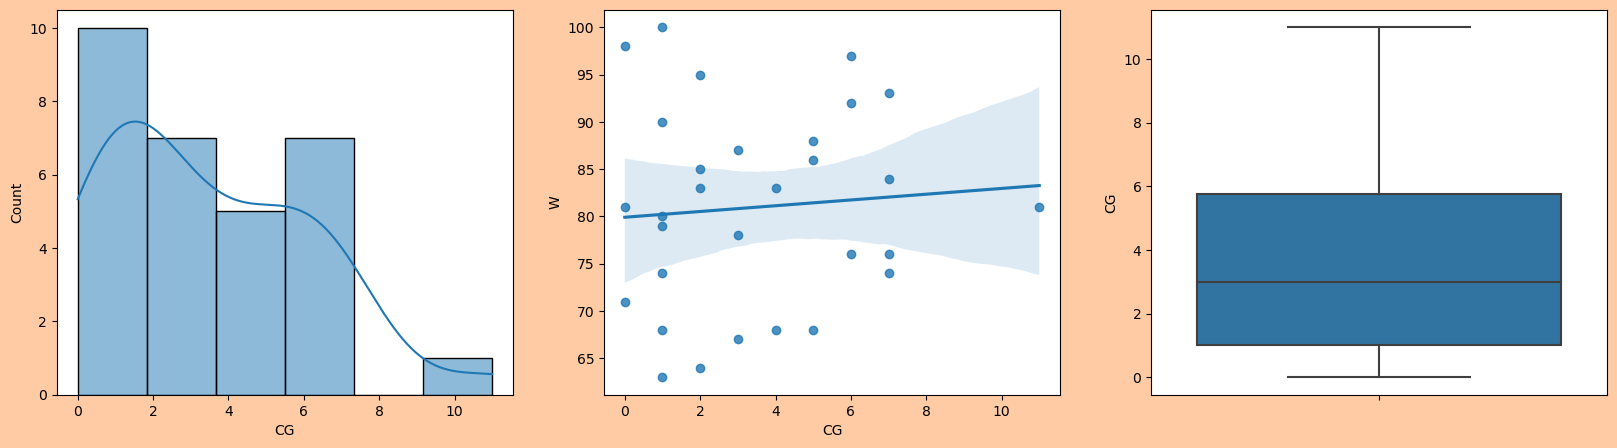

In [23]:
EDA(df,'CG')

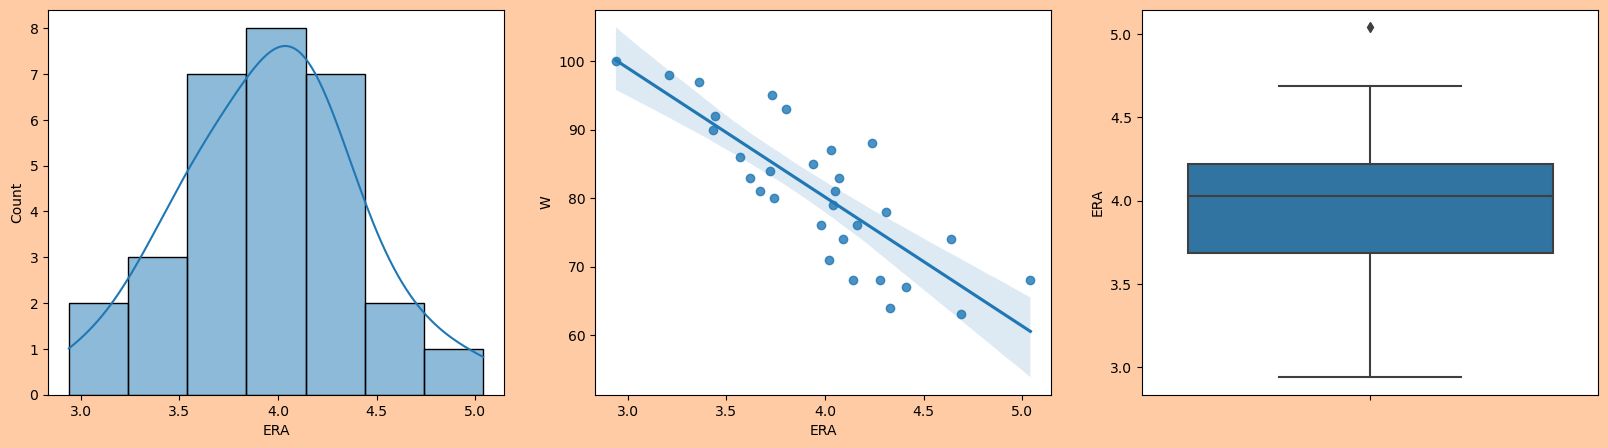

In [24]:
EDA(df,'ERA')

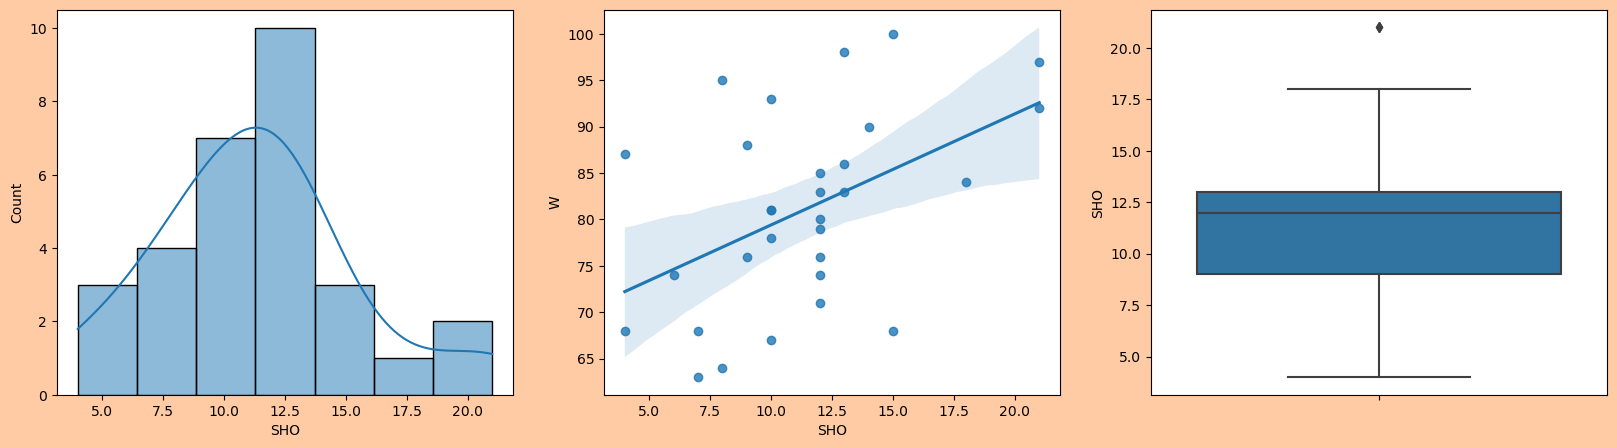

In [25]:
EDA(df,'SHO') 

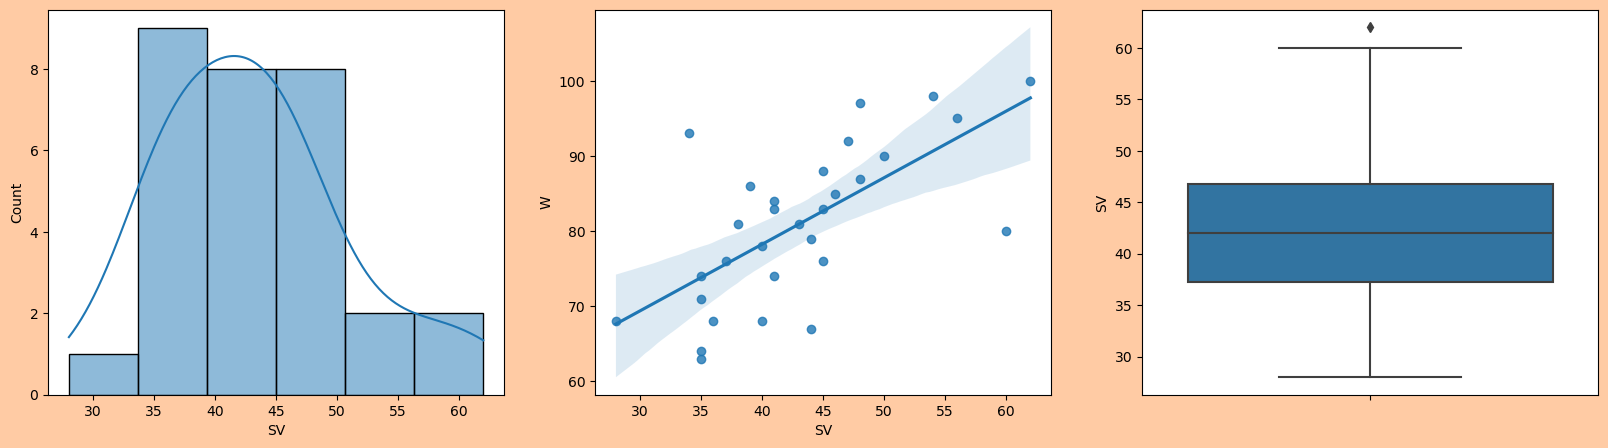

In [26]:
EDA(df,'SV') 

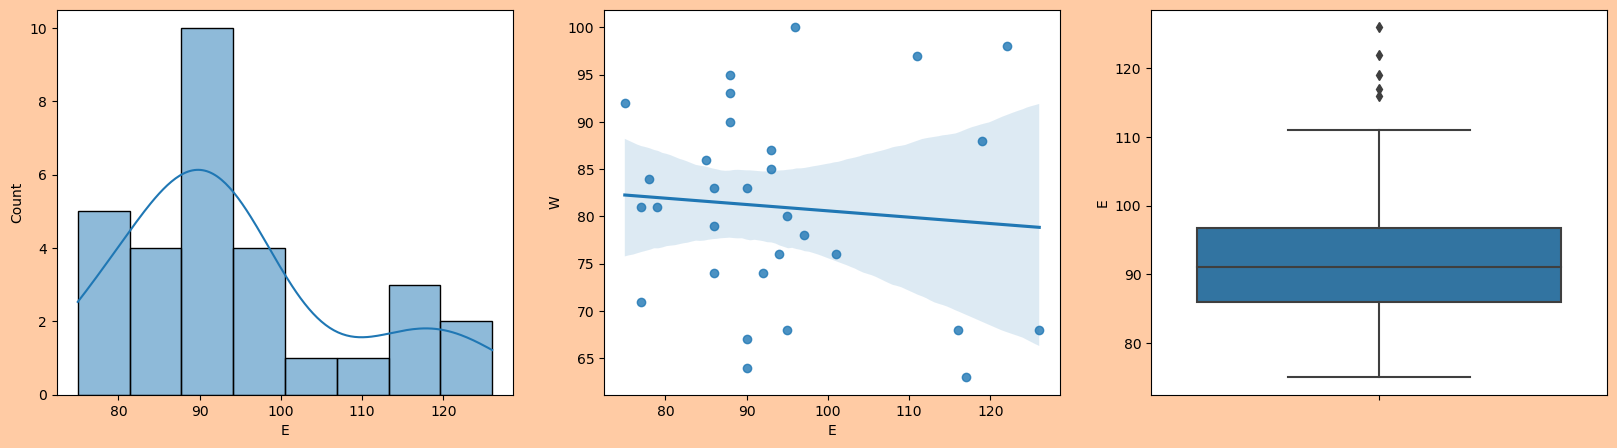

In [27]:
EDA(df,'E') 

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.03333333333333333


In [29]:
f = df1.drop('W', axis=1) #f for features
l = df1.W #l for label

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scalar = StandardScaler()
scaled_feature = scalar.fit_transform (f)

In [32]:
scaled_feature.shape

(29, 16)

In [33]:
f.shape

(29, 16)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = f.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


<Axes: >

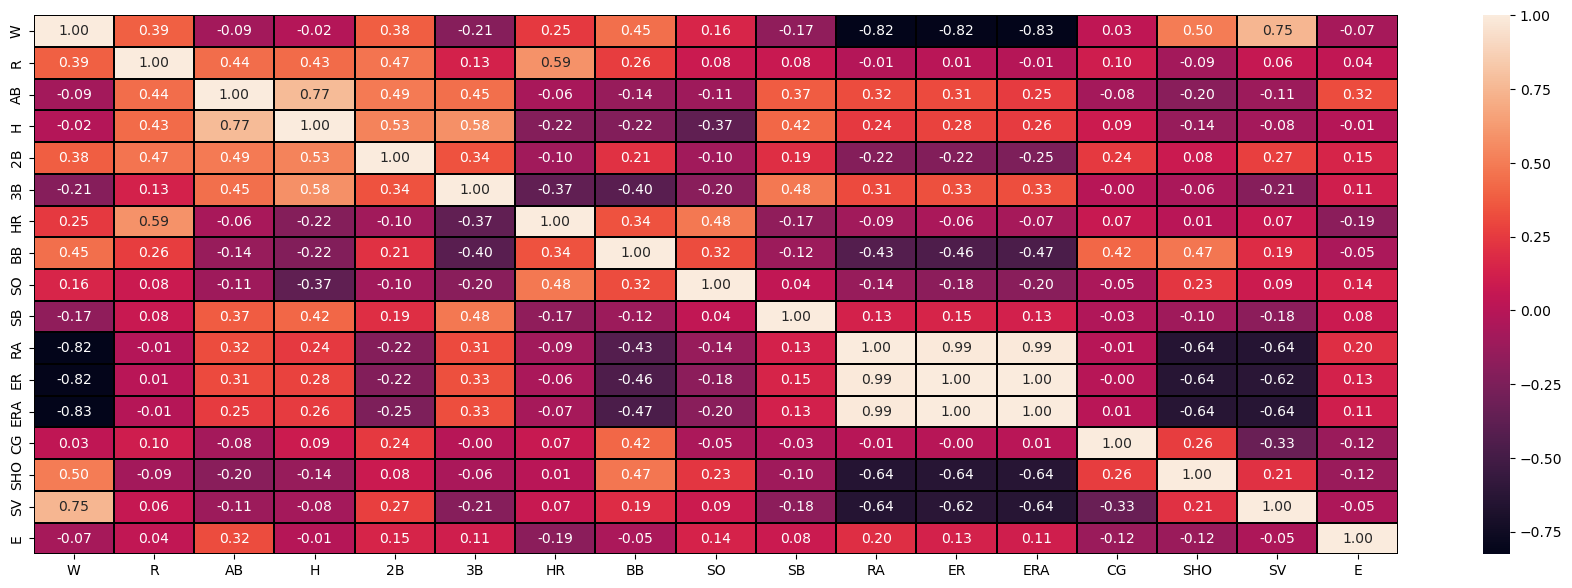

In [35]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [36]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

9

In [38]:
corr_features #highly correlated features name

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

In [39]:
df1.corr()['W'].sort_values() # f.corrwith(l)

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

<Axes: title={'center': 'Correlation with target'}>

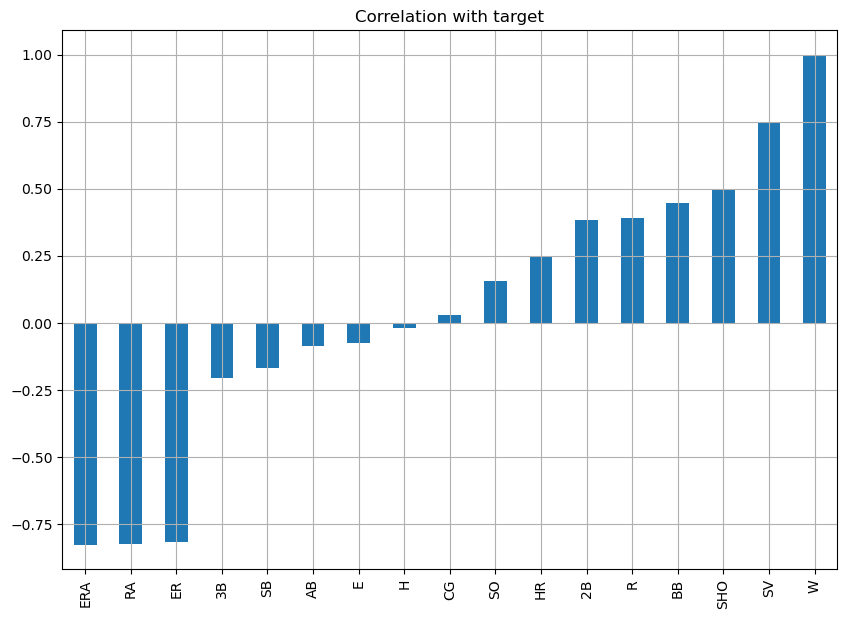

In [40]:
df1.corr()['W'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target')

In [41]:
f = df1.drop(columns=['W',  'AB', 'H',  '3B',   'SO', 'SB', 'RA', 'ER',
        'CG',  'E'], axis=1) #f for important only or best features
l = df1.W

In [42]:
scalar = StandardScaler()
scaled_feature = scalar.fit_transform (f)

In [43]:
# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = f.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,2.925754,R
1,2.155338,2B
2,2.475624,HR
3,1.684869,BB
4,3.257540,ERA
5,2.052548,SHO
6,1.954878,SV


In [44]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9648474191608399 on random state 30


In [45]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=30)

In [46]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [47]:
df.tail (2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [48]:
print ('Chance of Win is',lrm.predict (scalar.transform ([[650,260,148,426,4.09,6,41 ]])))

Chance of Win is [73.44857898]


In [49]:
print('Model accuracy score on training data------>',  lrm.score (x_train,y_train))
print('Model accuracy score on testing data------>',lrm.score(x_test,y_test))

Model accuracy score on training data------> 0.8820353239373457
Model accuracy score on testing data------> 0.9648474191608399


In [50]:
y_pred = lrm.predict(x_test)
y_pred

array([96.31928334, 73.44857898, 86.32076715, 85.44611395, 61.15502141,
       92.04634087, 80.91297443, 81.6268045 , 89.9487725 ])

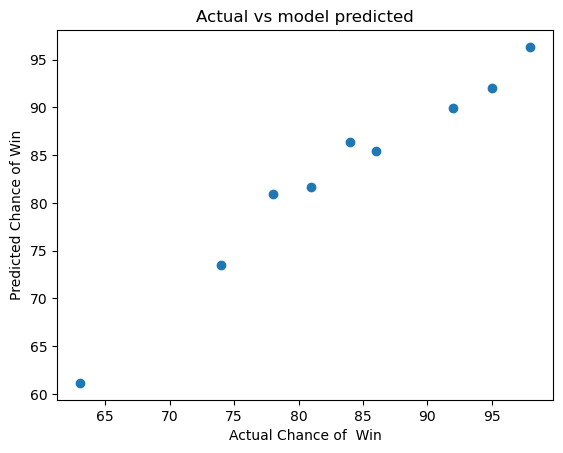

In [51]:
plt.scatter (y_test,y_pred)
plt.xlabel('Actual Chance of  Win')
plt.ylabel('Predicted Chance of Win')
plt.title('Actual vs model predicted')
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
y_pred = lrm.predict(x_test)

In [54]:
print ('mean_absolute_error is --->',mean_absolute_error(y_test,y_pred))
print ('mean_squared_error is --->',mean_squared_error(y_test,y_pred))
print ('mean_squared_error is --->',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_error is ---> 1.7218261132018544
mean_squared_error is ---> 3.7817233263264267
mean_squared_error is ---> 1.944665350729124
